In [76]:
import pandas as pd
import numpy as np

In [77]:
df = pd.read_csv("house_prices.csv")

In [78]:
df.head()

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [79]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [80]:
df.head()

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [81]:
df.shape

(99499, 8)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  99499 non-null  object 
 1   price          99499 non-null  int64  
 2   location       99499 non-null  object 
 3   city           99499 non-null  object 
 4   baths          99499 non-null  int64  
 5   purpose        99499 non-null  object 
 6   bedrooms       99499 non-null  int64  
 7   Area_in_Marla  99499 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.1+ MB


In [83]:
df.isna().sum()

property_type    0
price            0
location         0
city             0
baths            0
purpose          0
bedrooms         0
Area_in_Marla    0
dtype: int64

In [84]:
for column in df.columns:
    print(df[column].value_counts())

property_type
House            58169
Flat             26658
Upper Portion     8539
Lower Portion     5549
Penthouse          255
Room               241
Farm House          88
Name: count, dtype: int64
price
15000000    1727
6500000     1542
35000       1486
45000       1424
12500000    1400
            ... 
1790000        1
6169000        1
8970000        1
5499000        1
1247000        1
Name: count, Length: 1421, dtype: int64
location
DHA Defence               11787
Bahria Town Karachi        6697
Bahria Town Rawalpindi     5257
Bahria Town                4437
Gulistan-e-Jauhar          3532
                          ...  
Times Residency               1
CBR Town Phase 2              1
Montgomery Road               1
Sahianwala                    1
Shahra-e-Liaquat              1
Name: count, Length: 1389, dtype: int64
city
Karachi       37066
Lahore        26221
Islamabad     22243
Rawalpindi    11738
Faisalabad     2231
Name: count, dtype: int64
baths
3    30256
2    22660
4    1

C:\Users\Ali Ahmad\AppData\Local\Temp\ipykernel_9188\4212150488.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='property_type', order=df['property_type'].value_counts().index, palette='viridis')


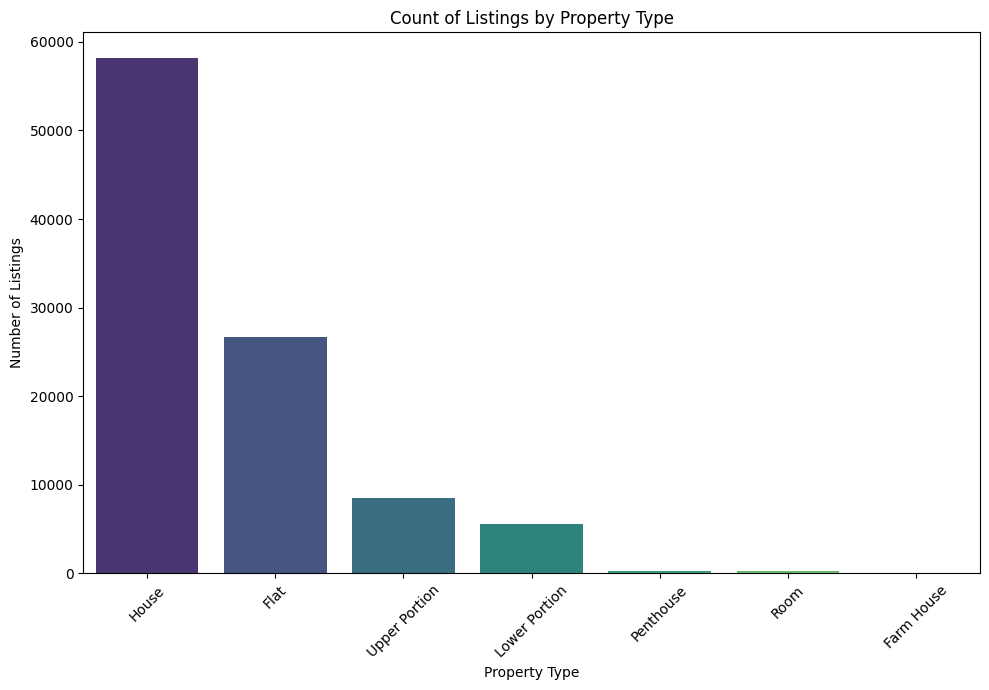

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.countplot(data=df, x='property_type', order=df['property_type'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Count of Listings by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

C:\Users\Ali Ahmad\AppData\Local\Temp\ipykernel_9188\3398618653.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='property_type', y='price', palette='Set2')


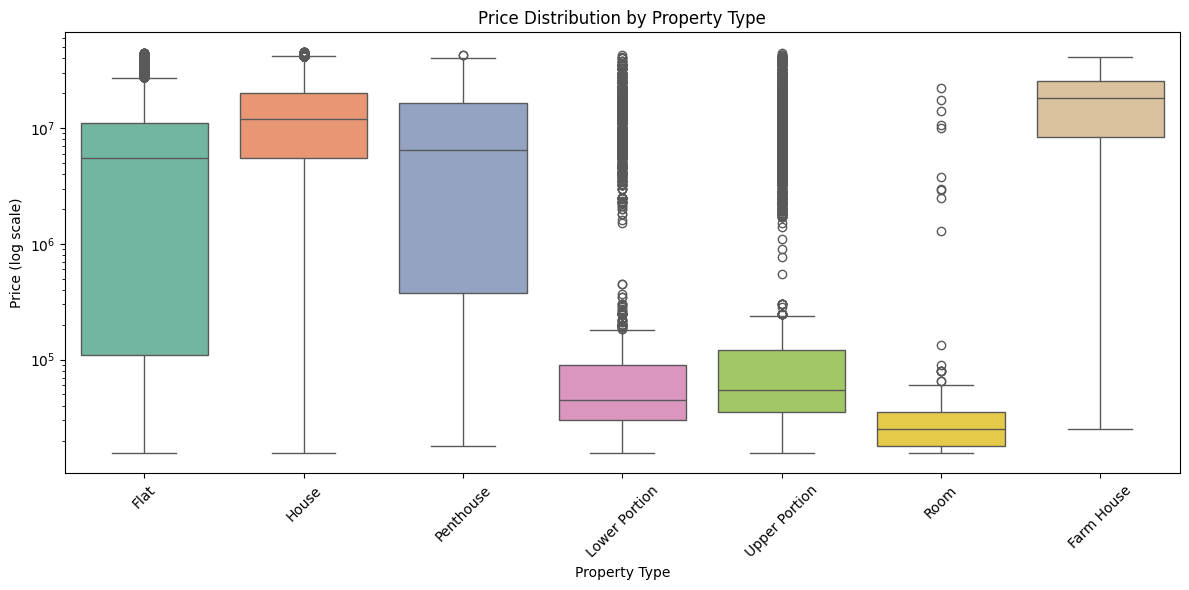

In [86]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='property_type', y='price', palette='Set2')
plt.xticks(rotation=45)
plt.yscale('log')  # optional: agar price ka range bohat wide ho
plt.title('Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price (log scale)')
plt.tight_layout()
plt.show()


C:\Users\Ali Ahmad\AppData\Local\Temp\ipykernel_9188\1870308474.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price, x='property_type', y='price', palette='magma')


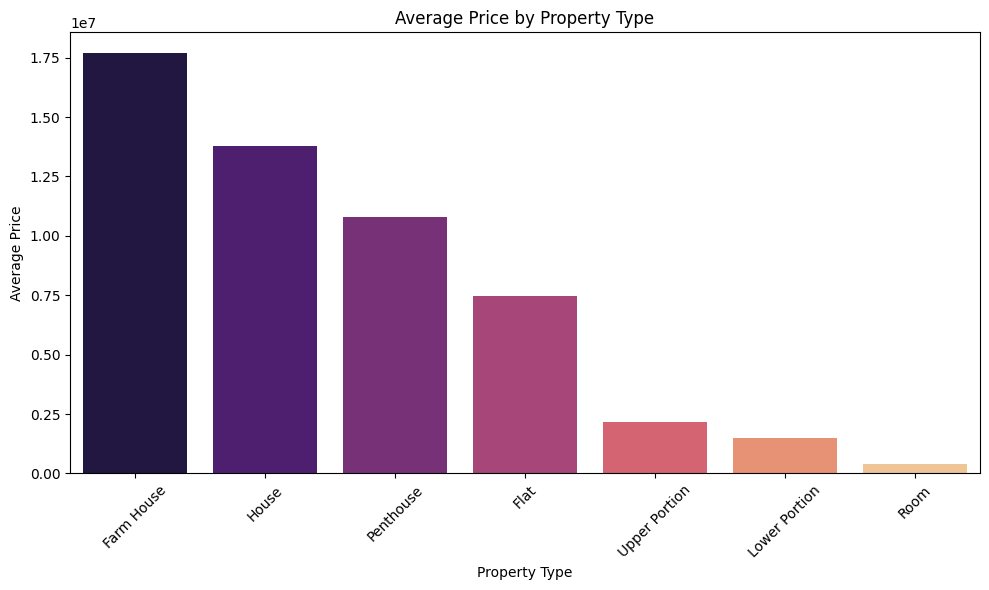

In [87]:
avg_price = df.groupby('property_type')['price'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_price, x='property_type', y='price', palette='magma')
plt.xticks(rotation=45)
plt.title('Average Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

## Insights:
- Farm House has average value is 1.75le7.
- Which is hightest average value but count of farm house in the data is only 255.
- There are some outliers in Upper portions and Lower portions
- Farm House, Foom and Penthouse count is less than 300 so we combine them

In [88]:
rare_types = ['Penthouse', 'Room', 'Farm House']
df['property_type'] = df['property_type'].apply(lambda x: 'Other' if x in rare_types else x)

In [89]:
df['property_type'].value_counts()

property_type
House            58169
Flat             26658
Upper Portion     8539
Lower Portion     5549
Other              584
Name: count, dtype: int64

<Axes: xlabel='property_type', ylabel='price'>

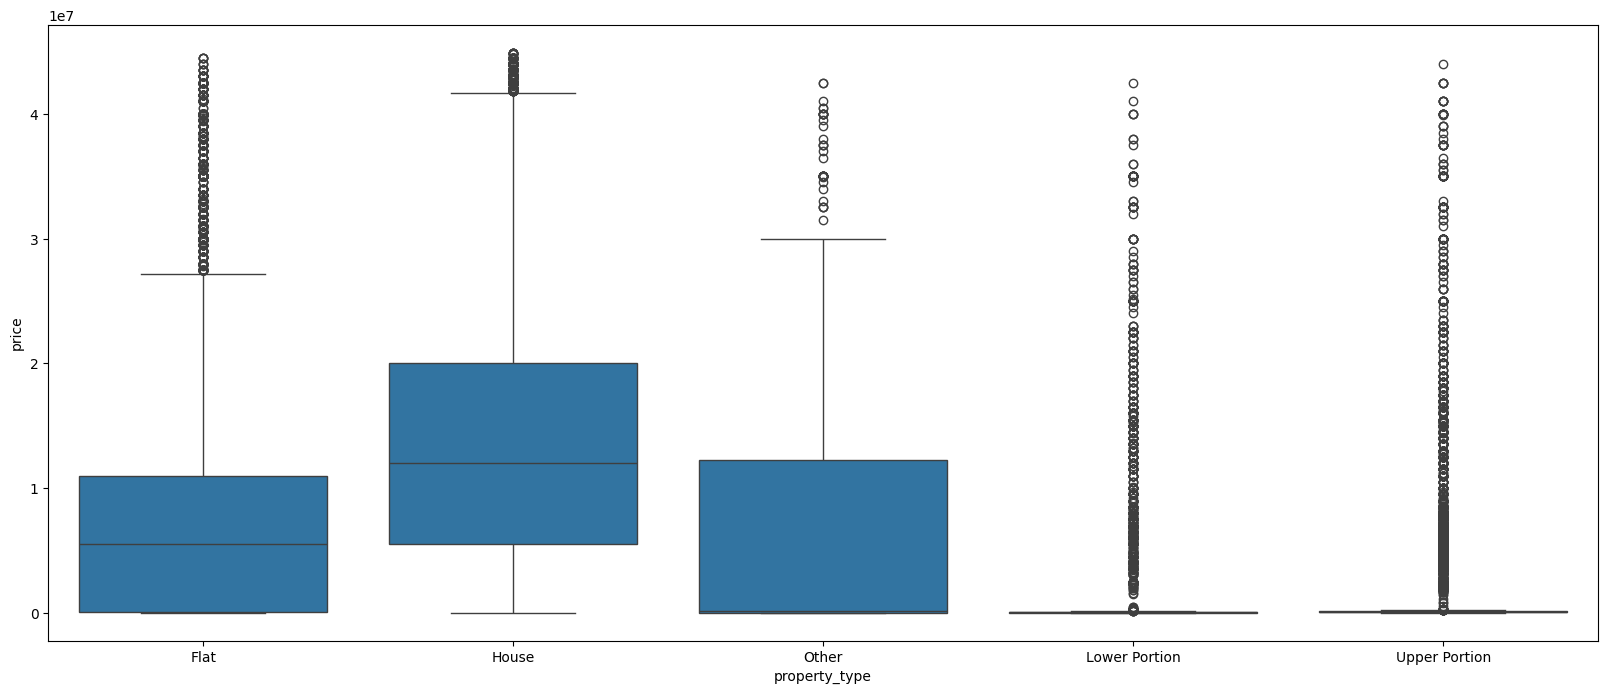

In [90]:
sns.boxplot(data=df, x='property_type', y='price')


In [91]:
top_locations = df['location'].value_counts().nlargest(50).index
df['location'] = df['location'].apply(lambda x:x if x in top_locations else 'others')

C:\Users\Ali Ahmad\AppData\Local\Temp\ipykernel_9188\1843644994.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='location', order=df['location'].value_counts().loc[top_locations].index, palette='Set3')


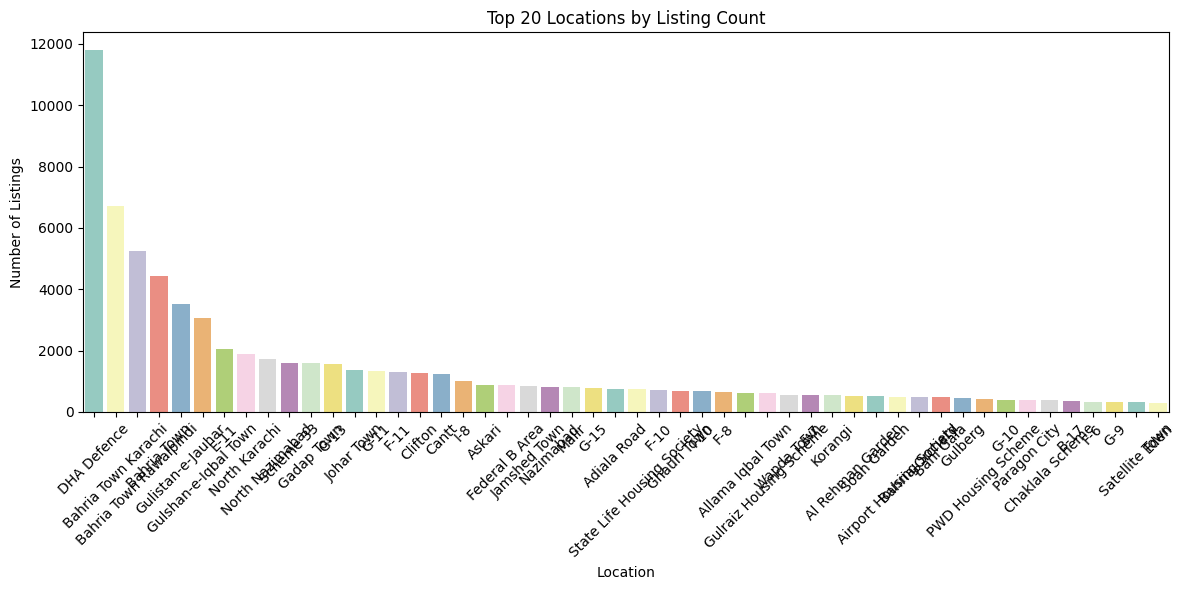

In [92]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='location', order=df['location'].value_counts().loc[top_locations].index, palette='Set3')
plt.xticks(rotation=45)
plt.title('Top 20 Locations by Listing Count')
plt.xlabel('Location')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

In [93]:
df['location'].value_counts()

location
others                        28522
DHA Defence                   11787
Bahria Town Karachi            6697
Bahria Town Rawalpindi         5257
Bahria Town                    4437
Gulistan-e-Jauhar              3532
Gulshan-e-Iqbal Town           3061
E-11                           2060
North Karachi                  1878
North Nazimabad                1729
Scheme 33                      1592
Gadap Town                     1583
G-13                           1570
Johar Town                     1352
G-11                           1321
F-11                           1285
Clifton                        1271
Cantt                          1226
I-8                             995
Askari                          889
Federal B Area                  876
Jamshed Town                    836
Nazimabad                       819
Malir                           805
G-15                            783
Adiala Road                     744
State Life Housing Society      738
F-10               

In [94]:
df['full_location'] = df['city'] + ' - ' + df['location']


In [95]:
df['full_location'].value_counts()

full_location
Lahore - others                        12618
Karachi - Bahria Town Karachi           6697
Karachi - DHA Defence                   5858
Rawalpindi - Bahria Town Rawalpindi     5257
Karachi - others                        5079
                                       ...  
Faisalabad - Nazimabad                     5
Faisalabad - Satellite Town                4
Islamabad - Wapda Town                     2
Faisalabad - Wapda Town                    1
Karachi - Allama Iqbal Town                1
Name: count, Length: 68, dtype: int64

In [96]:
top_full_locations = df['full_location'].value_counts().nlargest(40).index
df['full_location'] = df['full_location'].apply(lambda x: x if x in top_full_locations else 'Other')

In [97]:
df['full_location'].value_counts()

full_location
Lahore - others                        12618
Other                                   8223
Karachi - Bahria Town Karachi           6697
Karachi - DHA Defence                   5858
Rawalpindi - Bahria Town Rawalpindi     5257
Karachi - others                        5079
Islamabad - others                      4697
Rawalpindi - others                     3917
Lahore - Bahria Town                    3623
Lahore - DHA Defence                    3597
Karachi - Gulistan-e-Jauhar             3532
Karachi - Gulshan-e-Iqbal Town          3061
Islamabad - DHA Defence                 2332
Faisalabad - others                     2211
Islamabad - E-11                        2060
Karachi - North Karachi                 1878
Karachi - North Nazimabad               1729
Karachi - Scheme 33                     1592
Karachi - Gadap Town                    1583
Islamabad - G-13                        1570
Lahore - Johar Town                     1352
Islamabad - G-11                        1

In [98]:
df.head()

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla,full_location
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0,Other
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6,Islamabad - E-11
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0,Islamabad - G-15
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0,Other
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0,Islamabad - DHA Defence


In [99]:
df['type_city'] = df['property_type'] + ' - ' + df['city']

In [100]:
df['type_city'].value_counts()

type_city
House - Lahore                24743
Flat - Karachi                18753
House - Karachi               12834
House - Islamabad             10416
House - Rawalpindi             8199
Flat - Islamabad               5018
Upper Portion - Islamabad      3734
Upper Portion - Karachi        3378
Lower Portion - Islamabad      2866
House - Faisalabad             1977
Lower Portion - Karachi        1808
Flat - Rawalpindi              1532
Flat - Lahore                  1339
Upper Portion - Rawalpindi     1232
Lower Portion - Rawalpindi      754
Other - Karachi                 293
Other - Islamabad               209
Upper Portion - Faisalabad      139
Lower Portion - Faisalabad       85
Upper Portion - Lahore           56
Other - Lahore                   47
Lower Portion - Lahore           36
Other - Rawalpindi               21
Flat - Faisalabad                16
Other - Faisalabad               14
Name: count, dtype: int64

In [101]:
df['city'].value_counts()

city
Karachi       37066
Lahore        26221
Islamabad     22243
Rawalpindi    11738
Faisalabad     2231
Name: count, dtype: int64

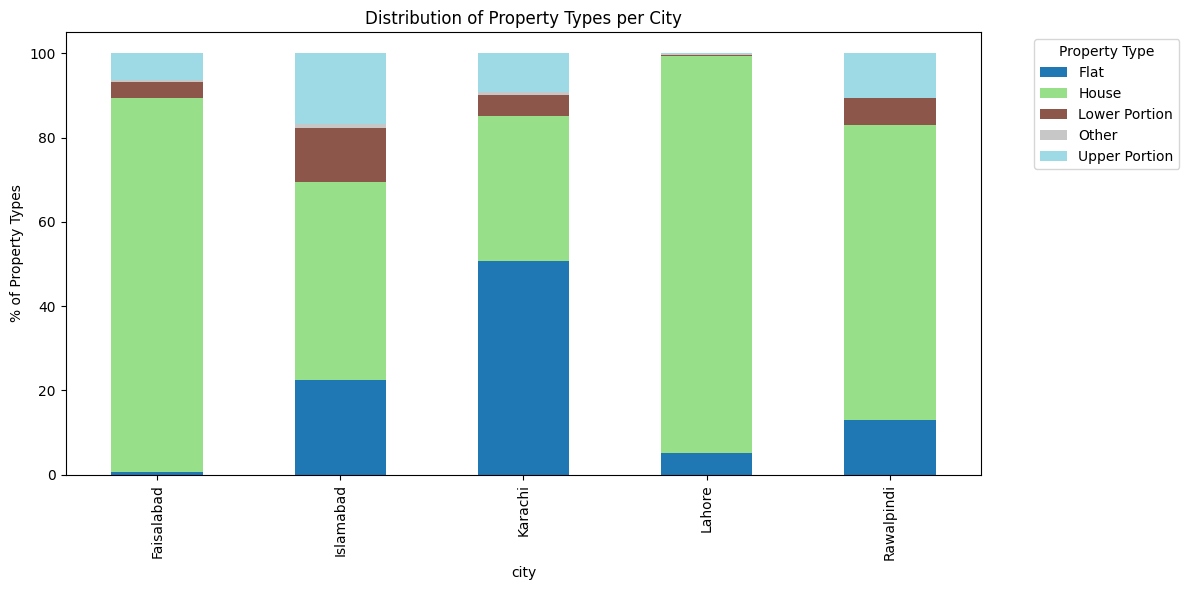

In [102]:
# Crosstab for property_type vs city
cross_tab = pd.crosstab(df['city'], df['property_type'], normalize='index') * 100
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.ylabel('% of Property Types')
plt.title('Distribution of Property Types per City')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Insights 
- only karachi has 50% flats and then Islamabas has 25% flat
- Lahore and Faisalabad has almost 95% houses.

In [103]:
df['baths'].value_counts()

baths
3    30256
2    22660
4    17120
5    11766
6    10745
1     4215
7     2737
Name: count, dtype: int64

In [104]:
df['baths'].describe()

count    99499.000000
mean         3.530106
std          1.474217
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          7.000000
Name: baths, dtype: float64

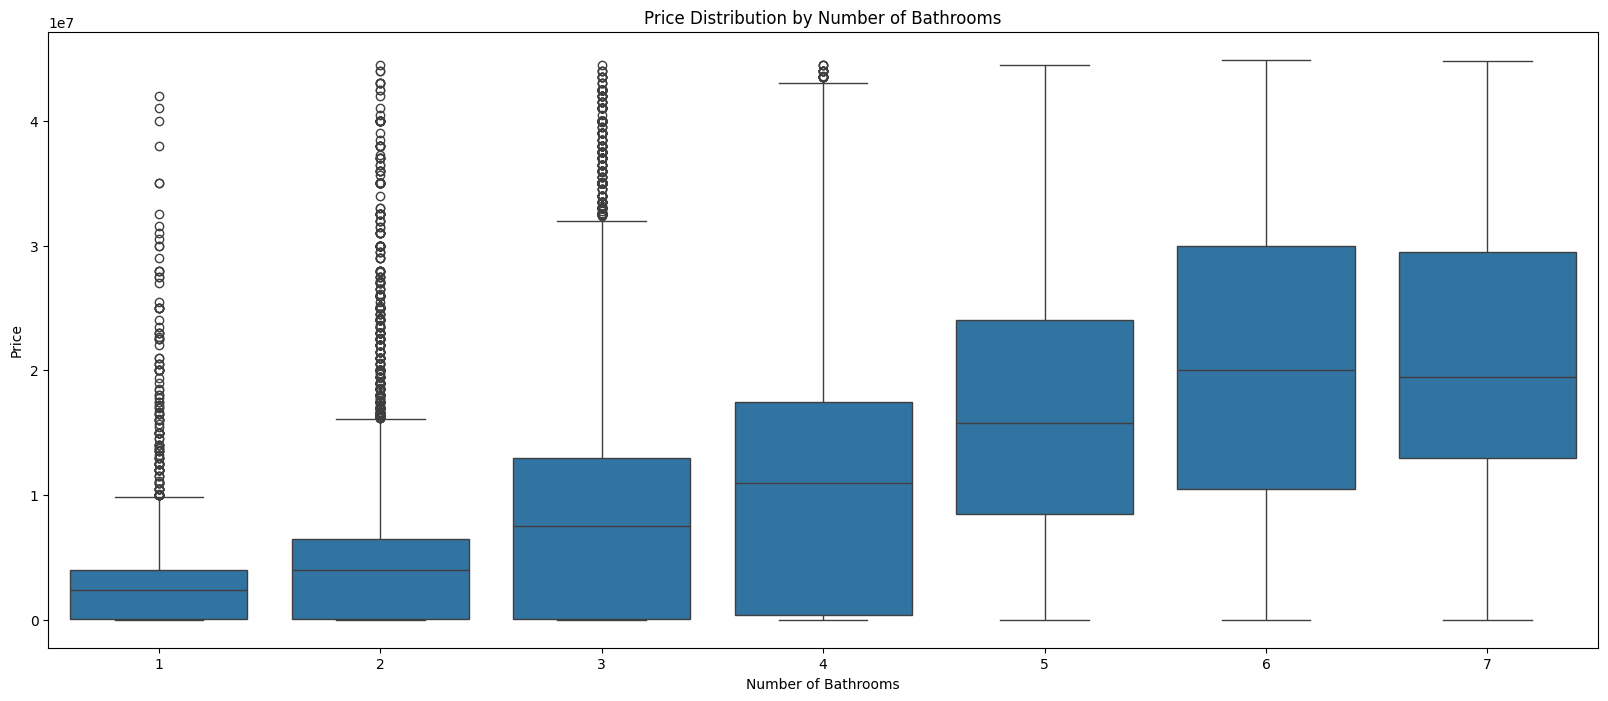

In [105]:
sns.boxplot(x='baths', y='price', data=df)
plt.title('Price Distribution by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

- The range of Bath is form 1 to 7.
- you’ll likely see positive correlation: more bathrooms → higher price.
- The mean is 3.
- 1,2,3,4 baths has some outliers.
- Most number of outliers in 1 bath property.

In [106]:
df['purpose'].value_counts()

purpose
For Sale    70947
For Rent    28552
Name: count, dtype: int64

<Axes: xlabel='purpose', ylabel='price'>

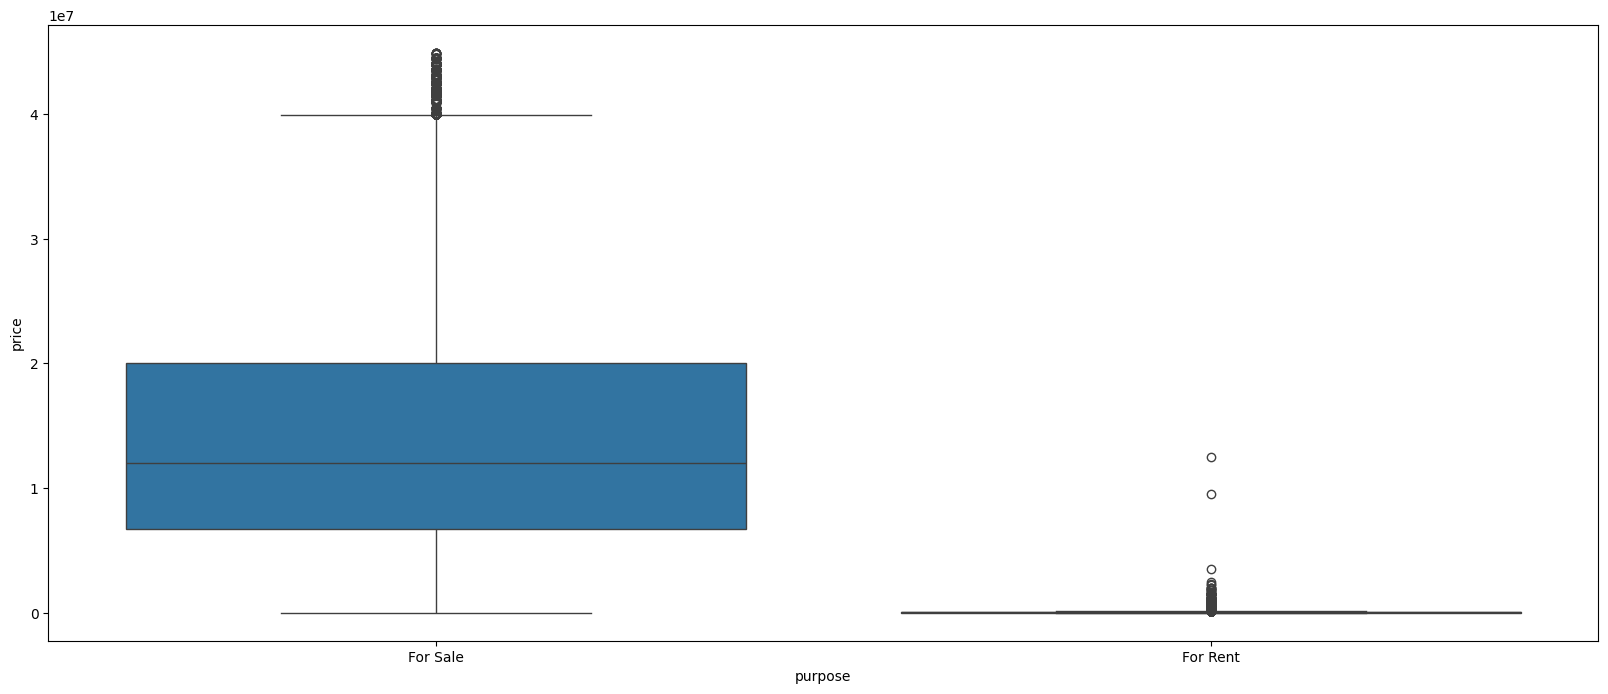

In [107]:
sns.boxplot(x='purpose', y='price', data=df)

- Yes the price of property which is for sale is higher and For Rent
- There is some outliers  in For Rent

In [108]:
df.columns

Index(['property_type', 'price', 'location', 'city', 'baths', 'purpose',
       'bedrooms', 'Area_in_Marla', 'full_location', 'type_city'],
      dtype='object')

In [109]:
df['bedrooms'].value_counts()

bedrooms
3    34888
2    23245
4    17458
5    14355
6     6275
1     2984
0      294
Name: count, dtype: int64

In [110]:
df['bedrooms'].describe()

count    99499.000000
mean         3.350737
std          1.255913
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: bedrooms, dtype: float64

- Mean ≈ 3.35
- Most common = 3 bedrooms
- Some entries have 0 bedrooms → likely missing or studio units

In [111]:
df = df[df['bedrooms'] > 0]

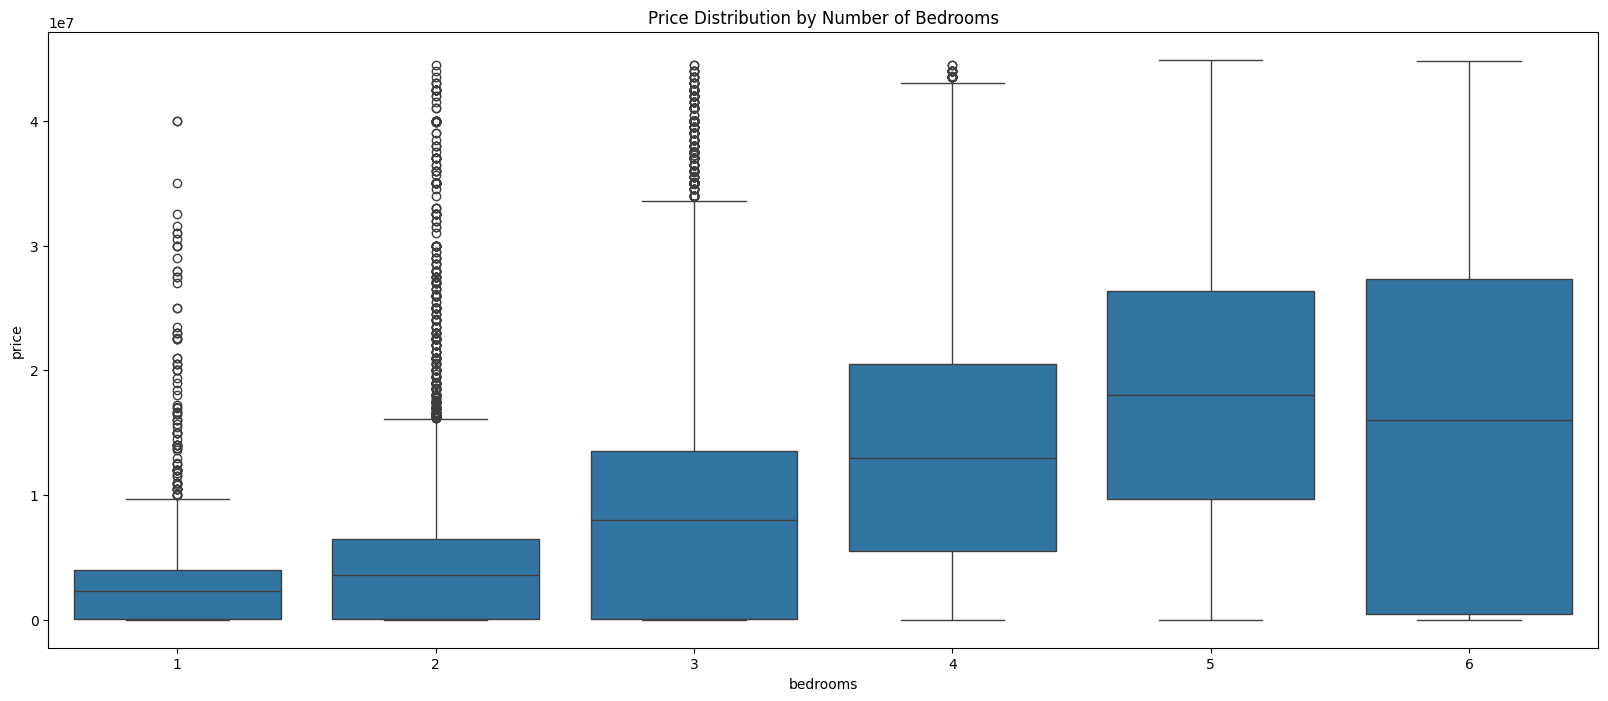

In [112]:
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title("Price Distribution by Number of Bedrooms")
plt.show()

- you’ll likely see positive correlation: more bedrooms → higher price.
- And there are some outliers in 1 bedroom property

In [113]:
df['Area_in_Marla'].value_counts()

Area_in_Marla
10.0     12251
5.0      12241
20.0      9105
8.0       7119
4.0       4396
         ...  
14.1         1
12.6         1
150.0        1
17.7         1
74.0         1
Name: count, Length: 240, dtype: int64

In [114]:
df['Area_in_Marla'].describe()

count    99205.000000
mean         8.763988
std          7.468824
min          0.000000
25%          4.800000
50%          6.800000
75%         10.000000
max        194.000000
Name: Area_in_Marla, dtype: float64

##  Issues Noticed:
- Min = 0.0 → likely missing or incorrect data
- Max = 194 → possibly outlier (e.g., commercial/farmhouse)

In [115]:
df = df[df['Area_in_Marla'] > 0]

In [116]:
upper_limit = df['Area_in_Marla'].quantile(0.99)
df = df[df['Area_in_Marla'] <= upper_limit]

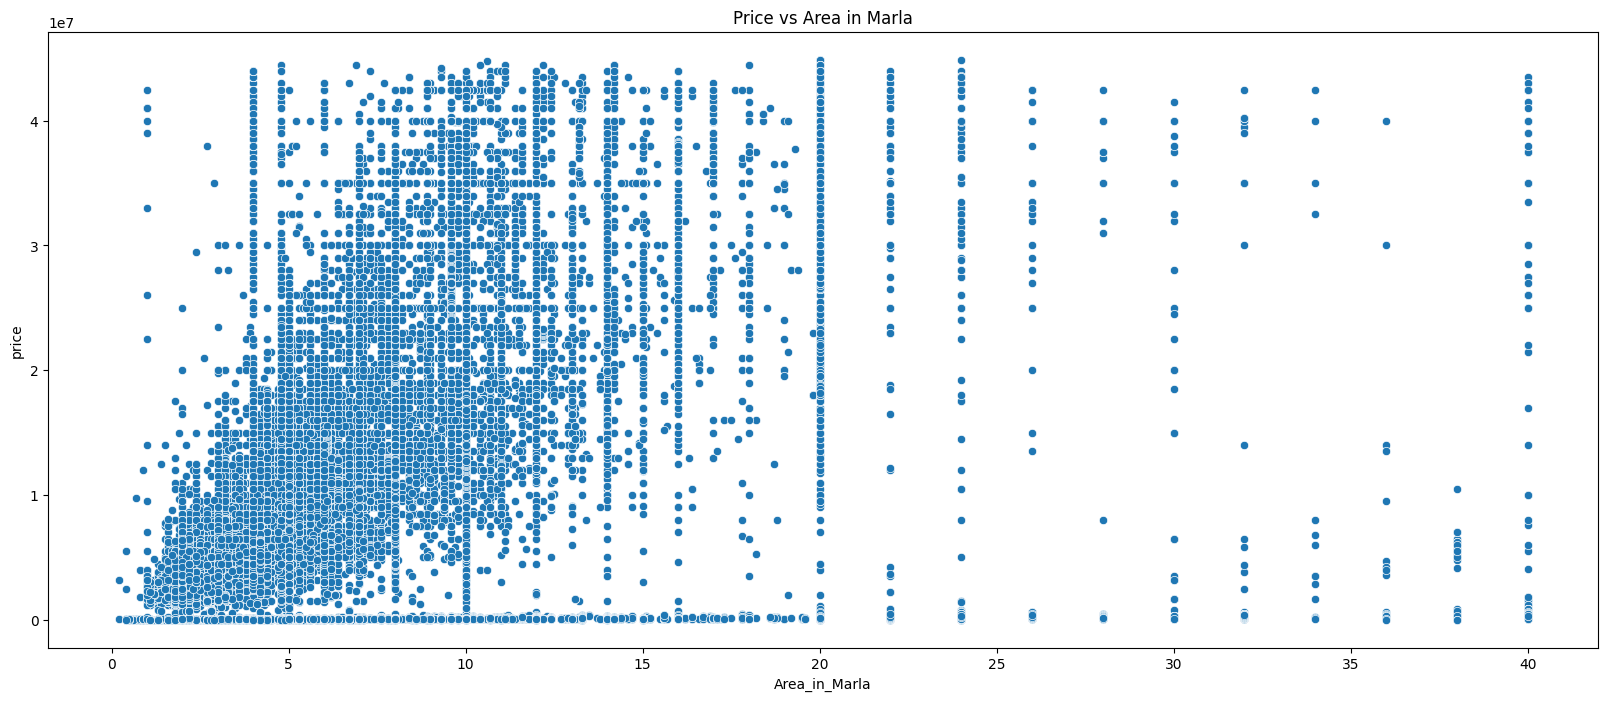

In [117]:
sns.scatterplot(x='Area_in_Marla', y='price', data=df)
plt.title('Price vs Area in Marla')
plt.show()

In [118]:
df.describe()

,price,baths,bedrooms,Area_in_Marla
count,9.879300e+04,98793.000000,98793.000000,98793.000000
mean,1.040122e+07,3.528367,3.357991,8.501649
std,1.066091e+07,1.471188,1.243185,5.936689
min,1.550000e+04,1.000000,1.000000,0.200000
25%,1.500000e+05,2.000000,2.000000,4.800000
50%,7.500000e+06,3.000000,3.000000,6.700000
75%,1.570000e+07,5.000000,4.000000,10.000000
max,4.490000e+07,7.000000,6.000000,40.000000


In [119]:
area_99 = df['Area_in_Marla'].quantile(0.99)
df = df[df['Area_in_Marla'] <= area_99]

In [120]:
df.head()

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla,full_location,type_city
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0,Other,Flat - Islamabad
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6,Islamabad - E-11,Flat - Islamabad
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0,Islamabad - G-15,House - Islamabad
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0,Islamabad - DHA Defence,House - Islamabad
5,Flat,7800000,E-11,Islamabad,2,For Sale,2,6.2,Islamabad - E-11,Flat - Islamabad


In [121]:
df.columns

Index(['property_type', 'price', 'location', 'city', 'baths', 'purpose',
       'bedrooms', 'Area_in_Marla', 'full_location', 'type_city'],
      dtype='object')

In [122]:
df.columns

Index(['property_type', 'price', 'location', 'city', 'baths', 'purpose',
       'bedrooms', 'Area_in_Marla', 'full_location', 'type_city'],
      dtype='object')

In [123]:
df = df[['location','property_type', 'city', 'baths', 'purpose',
 'bedrooms', 'Area_in_Marla', 'price']
]

df.head()

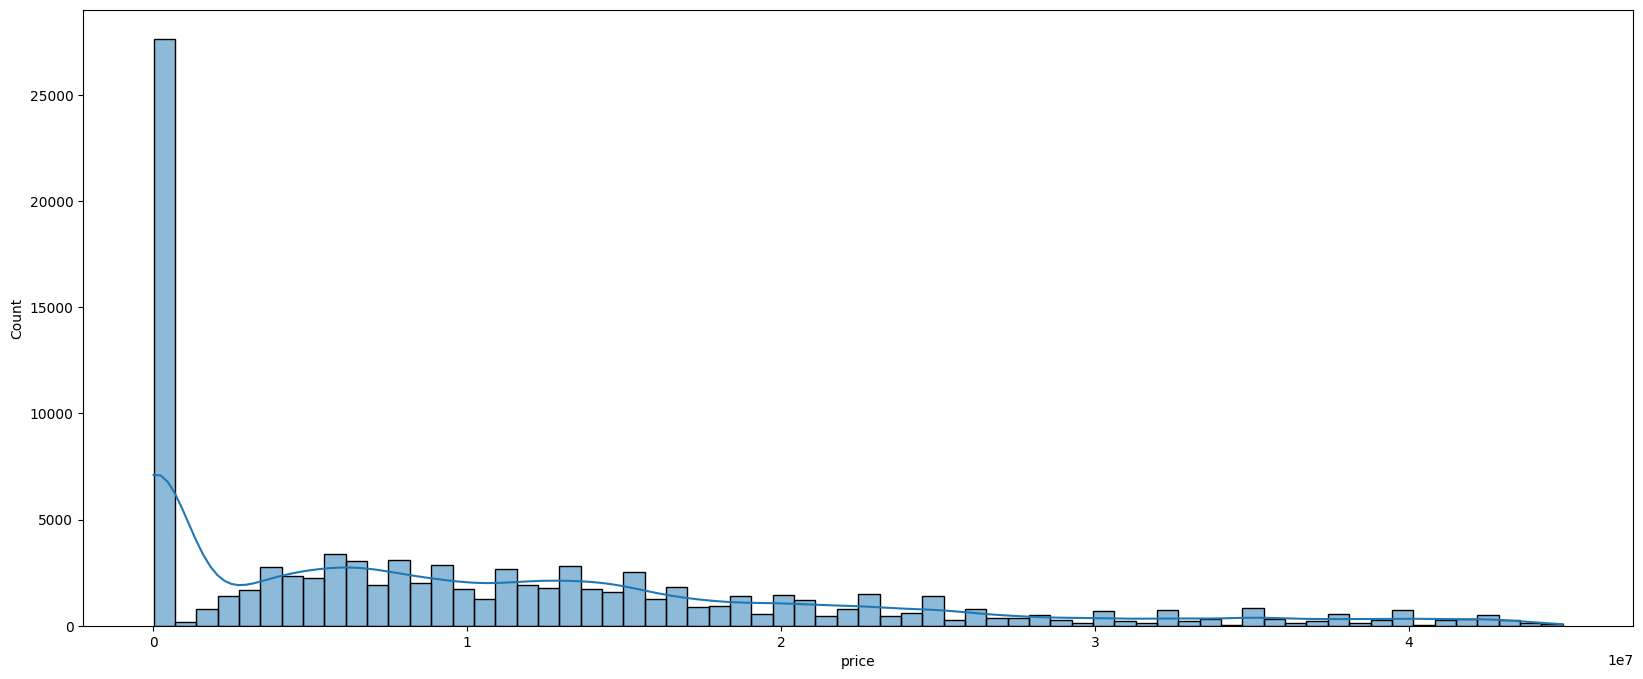

In [124]:
sns.histplot(data=df, x='price', kde=True)
plt.show()

In [125]:
df.isna().sum()

location         0
property_type    0
city             0
baths            0
purpose          0
bedrooms         0
Area_in_Marla    0
price            0
dtype: int64

In [126]:
df.to_csv("Cleaned_data.csv")

In [127]:
df.columns

Index(['location', 'property_type', 'city', 'baths', 'purpose', 'bedrooms',
       'Area_in_Marla', 'price'],
      dtype='object')

# Model Building

In [128]:
X = df.drop('price',axis = 1)
y= df['price']

In [129]:
X.columns

Index(['location', 'property_type', 'city', 'baths', 'purpose', 'bedrooms',
       'Area_in_Marla'],
      dtype='object')

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =42 )

In [132]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [133]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1. Define and fit the encoder on both columns
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit(X_train[['purpose','location','property_type', 'city']])

# 2. Transform the training data
encoded_train = pd.DataFrame(
    ohe.transform(X_train[['purpose','location','property_type', 'city']]),
    columns=ohe.get_feature_names_out(['purpose','location','property_type', 'city']),
    index=X_train.index
)

# 3. Transform the test data
encoded_test = pd.DataFrame(
    ohe.transform(X_test[['purpose','location','property_type', 'city']]),
    columns=ohe.get_feature_names_out(['purpose','location','property_type', 'city']),
    index=X_test.index
)

# 4. Drop the original columns and concatenate the encoded ones
X_train = X_train.drop(['purpose','location','property_type', 'city'], axis=1)
X_test = X_test.drop(['purpose','location','property_type', 'city'], axis=1)

X_train = pd.concat([X_train, encoded_train], axis=1)
X_test = pd.concat([X_test, encoded_test], axis=1)


In [134]:
X_train.shape

(78334, 66)

In [135]:
X_train.head()

,baths,bedrooms,Area_in_Marla,purpose_For Rent,purpose_For Sale,location_Adiala Road,location_Airport Housing Society,location_Al Rehman Garden,location_Allama Iqbal Town,location_Askari,...,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Other,property_type_Upper Portion,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi
47014,5,4,10.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9943,1,2,2.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
66319,1,1,2.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35952,3,2,4.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
73919,7,5,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [136]:
scaler = StandardScaler()

In [137]:
scaler.fit(X_train[['baths','bedrooms','Area_in_Marla']])

StandardScaler()

In [138]:
X_train[['baths','bedrooms','Area_in_Marla']] = scaler.transform(X_train[['baths','bedrooms','Area_in_Marla']])

In [139]:
X_test[['baths','bedrooms','Area_in_Marla']] = scaler.transform(X_test[['baths','bedrooms','Area_in_Marla']])

In [140]:
import xgboost as xgb

# Create and train the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [141]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 2043884.125
MSE: 12222832050176.0
R²: 0.8911429643630981


In [ ]:

from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'), 
                           param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', 
                           cv=3)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best parameters:", grid_search.best_params_)

Linear Regression : 68 %


D:\ai-projects-env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\ai-projects-env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Ali Ahmad\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Ali Ahmad\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Ali Ahmad\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, ti

K Nearest Neighbours : 89 %
Decision Tree : 80 %
Random Forest : 90 %
AdaBoost : 74 %
Gradient Boosting Regressor : 90 %
XGBRegressor : 90 %
CatBoostRegressor : 90 %


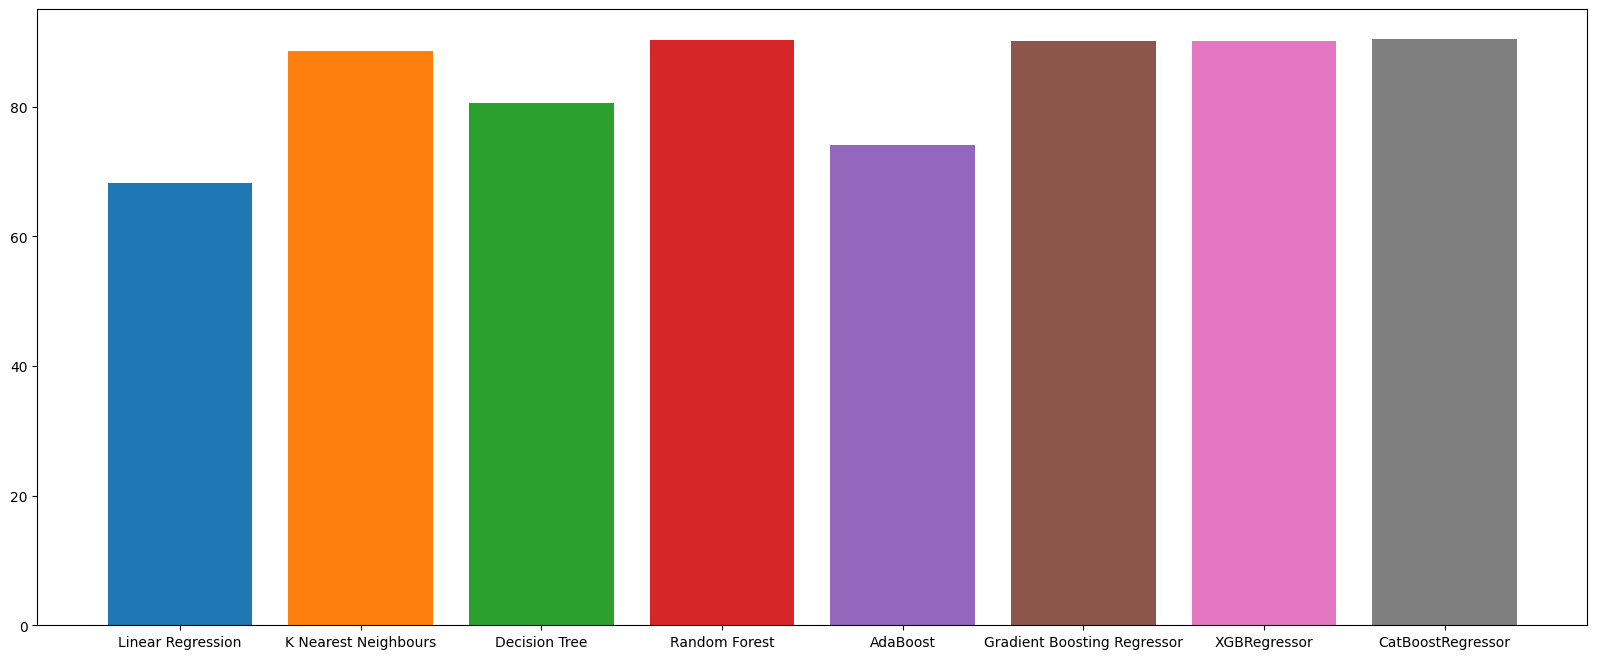

In [71]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor



lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)
xgb = XGBRegressor(max_depth = 7, n_estimators=500, learning_rate =.05)
cb  = CatBoostRegressor(learning_rate =.07, max_depth =7, verbose=0)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb),('CatBoostRegressor', cb)]

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

for regressor_name, regressor in regressors:

    regressor.fit(X_train, y_train)    
  
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

In [143]:
import pickle 
pickle.dump(model,open('xgb.pkl','wb'))

In [144]:
import pickle
pickle.dump(ohe,open('ohe.pkl','wb'))

In [145]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))

In [146]:
X_train.columns

Index(['baths', 'bedrooms', 'Area_in_Marla', 'purpose_For Rent',
       'purpose_For Sale', 'location_Adiala Road',
       'location_Airport Housing Society', 'location_Al Rehman Garden',
       'location_Allama Iqbal Town', 'location_Askari', 'location_B-17',
       'location_Bahria Orchard', 'location_Bahria Town',
       'location_Bahria Town Karachi', 'location_Bahria Town Rawalpindi',
       'location_Bani Gala', 'location_Cantt', 'location_Chaklala Scheme',
       'location_Clifton', 'location_DHA Defence', 'location_E-11',
       'location_Eden', 'location_F-10', 'location_F-11', 'location_F-6',
       'location_F-7', 'location_F-8', 'location_Federal B Area',
       'location_G-10', 'location_G-11', 'location_G-13', 'location_G-15',
       'location_G-9', 'location_Gadap Town', 'location_Ghauri Town',
       'location_Gulberg', 'location_Gulistan-e-Jauhar',
       'location_Gulraiz Housing Scheme', 'location_Gulshan-e-Iqbal Town',
       'location_I-10', 'location_I-8', 'locati

In [ ]:
df.head()

In [ ]:
df[df['city'] == 'Islamabad']['location'].unique()